## Model Interpretation

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

X_train = pd.read_feather('./X_train.feather')
y_train = pd.read_feather('./y_train.feather')['shares']

X_val = pd.read_feather('./X_val.feather')
y_val = pd.read_feather('./y_val.feather')['shares']

rfr = RandomForestRegressor(n_estimators=42, max_features='log2', min_samples_leaf=46)
rfr.fit(X_train, y_train)
rfr.score(X_val, y_val)

0.0465601305038742

In [3]:
pwd

'/Users/jeff/Documents/jigsaw/curriculum/yeshiva-notes/student-work/mahriya'

In [4]:
import eli5
from eli5.sklearn import PermutationImportance
pmi_limited = PermutationImportance(rfr).fit(X_val, y_val)

In [5]:
eli5.explain_weights_df(pmi_limited, feature_names = X_val.columns.to_list())

,feature,weight,std
0,kw_max_avg,0.024703,0.002037
1,self_reference_avg_sharess,0.020182,0.004262
2,kw_min_avg,0.005673,0.001020
3,data_channel_missing,0.005605,0.000984
4,Dayofyear,0.004981,0.000741
5,num_hrefs,0.004295,0.000373
6,average_token_length,0.001765,0.001330
7,num_videos,0.001733,0.000746


### Model Interpretation

In [6]:
df_train = X_train.merge(y_train, on=y_train.index).drop(columns=['key_0'])
df_train.head()

,num_hrefs,num_videos,average_token_length,kw_min_avg,kw_max_avg,self_reference_avg_sharess,Dayofyear,data_channel_missing,shares
0,4.0,11.0,4.608309,0.000000,4975.190476,7300.000000,11.0,1.0,622
1,5.0,0.0,5.346939,0.000000,4755.043584,34148.666670,304.0,0.0,2600
2,4.0,0.0,4.904040,1124.000000,3287.700428,3266.666667,310.0,0.0,1400
3,7.0,0.0,4.767296,1332.454545,6932.138936,14700.000000,336.0,0.0,7000
4,3.0,0.0,4.961240,0.000000,3571.800035,1097.500000,87.0,0.0,903


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25307 entries, 0 to 25306
Data columns (total 9 columns):
num_hrefs                     25307 non-null float64
num_videos                    25307 non-null float64
average_token_length          25307 non-null float64
kw_min_avg                    25307 non-null float64
kw_max_avg                    25307 non-null float64
self_reference_avg_sharess    25307 non-null float64
Dayofyear                     25307 non-null float64
data_channel_missing          25307 non-null float64
shares                        25307 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.9 MB


In [8]:
from plotnine import *
sampled_train = df_train.sample(n=3000, random_state=13)

In [17]:
from graph import plot, trace_values

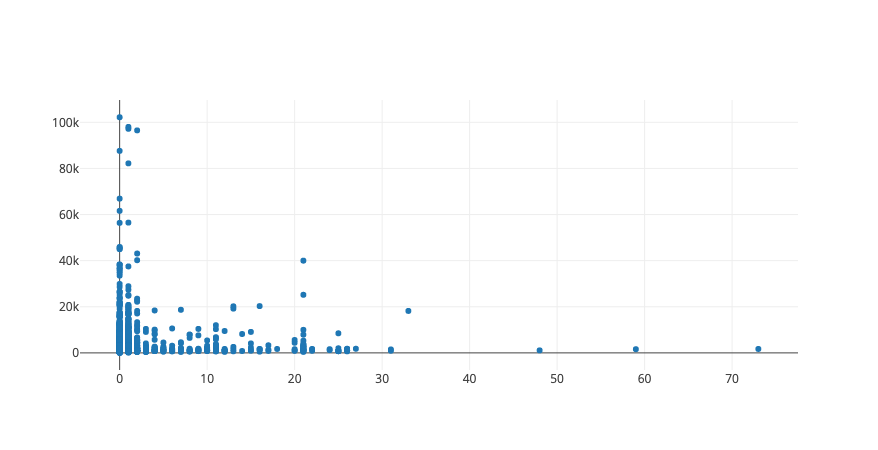

In [19]:
trace = trace_values(sampled_train['num_videos'], sampled_train['shares'])
plot([trace])

In [18]:
# sampled_train['num_videos'].value_counts()

In [20]:
# sampled_train['shares']

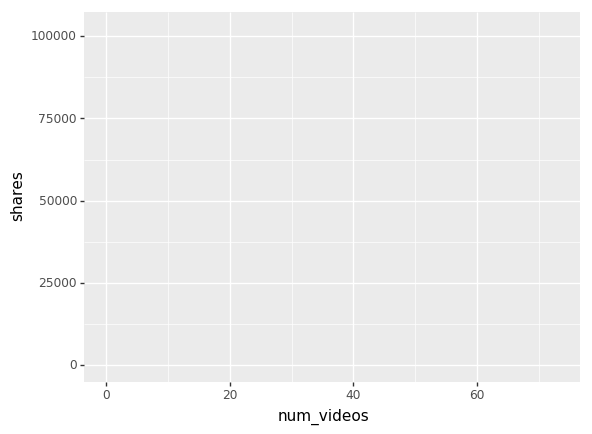

<ggplot: (7552358292)>

In [10]:
(ggplot(sampled_train, aes('num_videos', 'shares')))

C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:238: UserWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "See sklearn.gaussian_process.GaussianProcessRegressor "
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_smooth : Removed 54 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


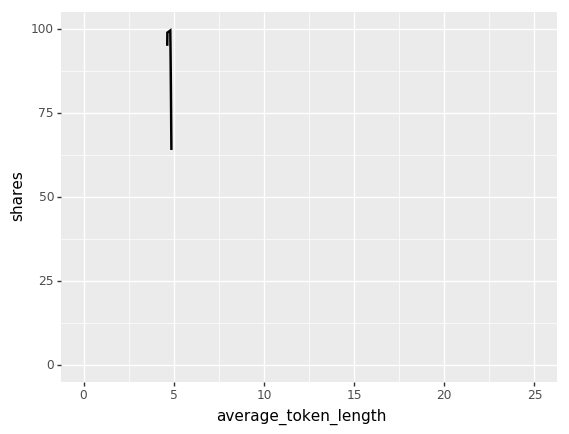

<ggplot: (137269200574)>

In [16]:
(ggplot(sampled_train, aes('average_token_length', 'shares'))
 + stat_smooth(se=True, method='gpr') + xlim(0, 25) + ylim(0, 100))

In [18]:
(ggplot(sampled_train, aes('num_videos', 'shares'))
 + stat_smooth(se=True, method='gpr') + xlim(13, 14) + ylim(0, 100))

ValueError: No objects to concatenate